## Note
File for exploring data. Distribution, outliers, visualization etc.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math 

In [15]:
## Converting .csv file to a pandas df
df = pd.read_csv("../csv_files/development.csv")

In [109]:
## Description of the data
df.describe()

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,...,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,397.723735,404.106355,4.866423,-5.046162,4.330495,97.593811,1.340462,16.510543,-9.187917,10.504198,...,608.650804,-42.152047,583.569358,71.628631,0.452944,609.060121,-46.921923,583.060292,71.695363,0.371027
std,120.593104,113.652228,1.481220,15.877804,3.489414,59.444364,0.342167,16.781018,29.955290,8.444105,...,13.723698,3.158175,6.646175,0.577619,0.299456,13.928735,3.478838,6.992203,0.585629,0.081983
min,200.000000,200.000000,1.394440,-7741.109923,-0.582573,0.000000,0.275854,2.028134,-9930.114637,-0.997301,...,451.502789,-51.840704,516.386725,70.420683,0.129428,456.816620,-57.876959,513.760083,70.423425,0.102138
25%,285.000000,310.000000,4.123941,-5.257178,2.383830,46.400000,1.096611,5.619728,-8.114323,4.755876,...,598.888989,-44.601152,579.190080,71.144733,0.342264,599.390156,-49.596344,578.269642,71.200245,0.321753
50%,400.000000,405.000000,4.668321,-4.646420,3.361071,90.600000,1.316209,10.068513,-5.229009,7.886552,...,607.190645,-42.360754,583.512671,71.627565,0.400117,607.202368,-47.147636,583.401620,71.681603,0.366981
75%,500.000000,500.000000,5.265888,-4.093211,5.104368,151.026985,1.557156,19.031319,-4.387686,12.945553,...,616.837596,-39.833169,587.982952,72.134776,0.466077,617.313303,-44.375652,587.877953,72.194196,0.415578
max,600.000000,600.000000,20.515415,-0.745816,149.589043,204.600000,6.088277,106.649066,-1.054508,152.517700,...,665.267443,-29.085419,614.884980,72.856918,5.031400,675.052221,-29.592059,619.099952,73.031394,4.925181


/Users/louislinnerud/Documents/skole/4.klasse/7.semester/Data science lab/semesteroppgave/DSLvenv/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


array([[<Axes: title={'center': 'pmax[1]'}>,
        <Axes: title={'center': 'negpmax[1]'}>],
       [<Axes: title={'center': 'area[1]'}>,
        <Axes: title={'center': 'tmax[1]'}>],
       [<Axes: title={'center': 'rms[1]'}>, <Axes: >]], dtype=object)

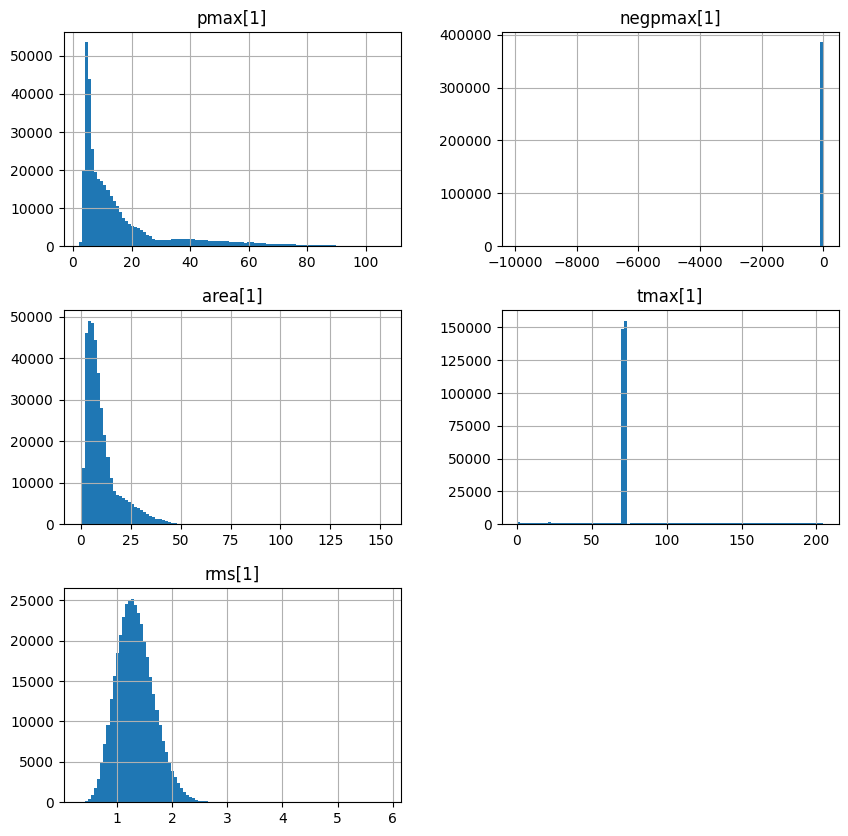

In [110]:
## Histogram of the 5 features on the first pad
log_transformed_df = np.log1p(df)
pad_0_log = log_transformed_df[["pmax[1]", "negpmax[1]", "area[1]", "tmax[1]", "rms[1]"]]
pad_0 = df[["pmax[1]", "negpmax[1]", "area[1]", "tmax[1]", "rms[1]"]]
pad_0.hist(bins=100, figsize=(10,10))
# pad_0_log.hist(bins=100, figsize=(10,10))

array([[<Axes: title={'center': 'pmax[1]'}>,
        <Axes: title={'center': 'negpmax[1]'}>],
       [<Axes: title={'center': 'area[1]'}>,
        <Axes: title={'center': 'tmax[1]'}>],
       [<Axes: title={'center': 'rms[1]'}>, <Axes: >]], dtype=object)

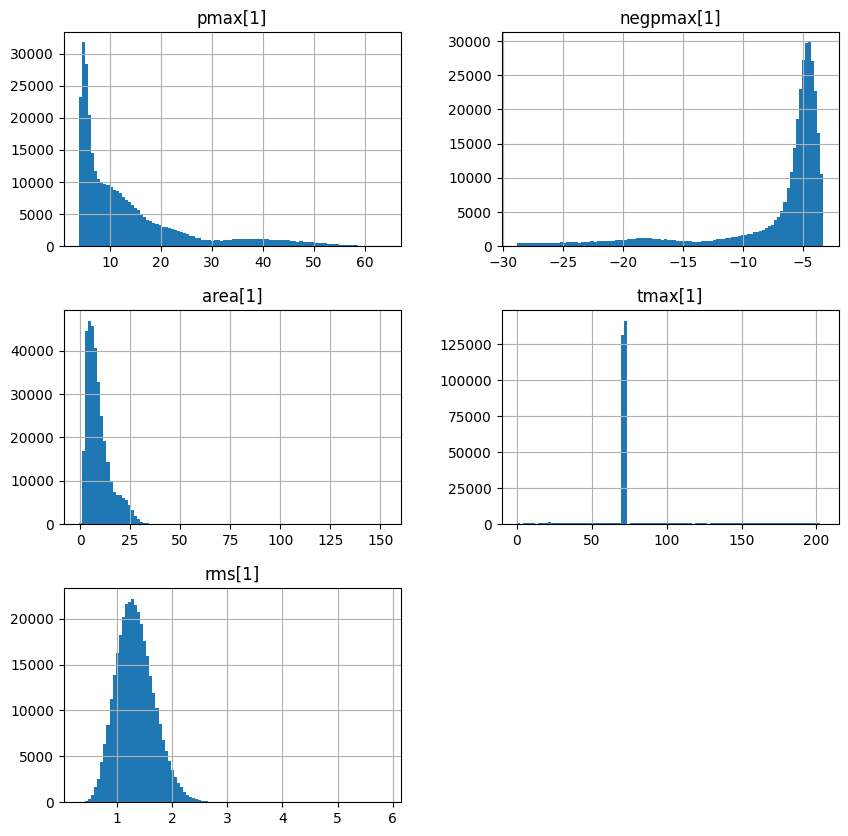

In [111]:
## Extracting only the values between 0.03 and 0.97 quantile
pmax_97 = pad_0["pmax[1]"].quantile(0.97)
pmax_03 = pad_0["pmax[1]"].quantile(0.03)
pad_0 = pad_0[pad_0["pmax[1]"] <= pmax_97]
pad_0 = pad_0[pad_0["pmax[1]"] >= pmax_03]

negpmax_97 = pad_0["negpmax[1]"].quantile(0.97)
negpmax_03 = pad_0["negpmax[1]"].quantile(0.03)
pad_0 = pad_0[pad_0["negpmax[1]"] <= negpmax_97]
pad_0 = pad_0[pad_0["negpmax[1]"] >= negpmax_03]

# area_97 = pad_0["area[0]"].quantile(0.97)
# pad_0 = pad_0[pad_0["area[0]"] <= area_97]

# tmax_97 = pad_0["tmax[0]"].quantile(0.97)
# pad_0 = pad_0[pad_0["tmax[0]"] <= tmax_97]

# rms_97 = pad_0["rms[0]"].quantile(0.97)
# pad_0 = pad_0[pad_0["rms[0]"] <= rms_97]

pad_0.hist(bins=100, figsize=(10,10))

In [112]:
def filter_by_percentile(df, lower_quantile=0.03, upper_quantile=0.97):
    for col in df.columns:
        if col == "x" or col == "y":
            continue
        # Calculate the quantiles for each column
        lower_bound = df[col].quantile(lower_quantile)
        upper_bound = df[col].quantile(upper_quantile)

        # Filter the DataFrame by the quantile range
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# ## Dropping data from x and y 
# df.drop(["x", "y"], axis=1, inplace=True)

df_quantile = filter_by_percentile(df)

In [103]:
print(len(df["negpmax[10]"]))
print(len(df_quantile["negpmax[10]"]))

385500
1759


In [34]:
def quantile2(dframe, lw=0.05, up=0.95, drop=True):
    tresholds = {}
    for col_name in dframe.columns:
        lw_tresh = dframe[col_name].quantile(lw)
        up_tresh = dframe[col_name].quantile(up)
        tresholds[col_name] = [lw_tresh, up_tresh]
    print(f"tresholds for {lw}, {up}: {tresholds}")
    initial_dim = dframe.shape
    for col_name in dframe.columns:
        if drop:
            dframe.drop(dframe[dframe[col_name] < tresholds[col_name][0]].index, inplace=True)
            dframe.drop(dframe[dframe[col_name] > tresholds[col_name][1]].index, inplace=True)
        else:
            dframe.loc[df[col_name] < tresholds[col_name][0], col_name] = tresholds[col_name][0]
            dframe.loc[df[col_name] > tresholds[col_name][1], col_name] = tresholds[col_name][1]

    new_dim = dframe.shape
    print(f"""
          initial dim:   {initial_dim}
          new dim:       {new_dim}
          a reduction of {((initial_dim[0]-new_dim[0])/initial_dim[0])*100}% of rows
          """)
    

In [35]:
tester = df.copy()
print(len(tester.columns))
quantile2(tester.sample(1000),0.01,0.99,drop=False)
print(df.shape)

92
tresholds for 0.01, 0.99: {'x': [200.0, 600.0], 'y': [205.0, 600.0], 'pmax[0]': [3.0398546142578344, 13.423463897705053], 'negpmax[0]': [-18.00129884156863, -3.000246154785111], 'area[0]': [1.0880728393554324, 17.899456488037274], 'tmax[0]': [1.1980000000000002, 202.804], 'rms[0]': [0.7006070854848326, 2.174207349005698], 'pmax[1]': [3.422579379675461, 80.50898965454105], 'negpmax[1]': [-44.77804031372075, -3.052280487060503], 'area[1]': [1.6628185424804693, 39.93182189941397], 'tmax[1]': [8.805868862057949, 196.00799999999998], 'rms[1]': [0.6129311577398074, 2.1958224858933435], 'pmax[2]': [3.148492067922781, 40.68967535400388], 'negpmax[2]': [-21.671174316406226, -2.956616668701173], 'area[2]': [1.2228273620605468, 22.454175793456645], 'tmax[2]': [2.7960000000000003, 198.408], 'rms[2]': [0.6718631219633473, 2.2839859335383337], 'pmax[3]': [3.9618382263184047, 106.03185067749027], 'negpmax[3]': [-62.419204956054664, -3.083050598144487], 'area[3]': [2.2446338256835716, 50.8176182617

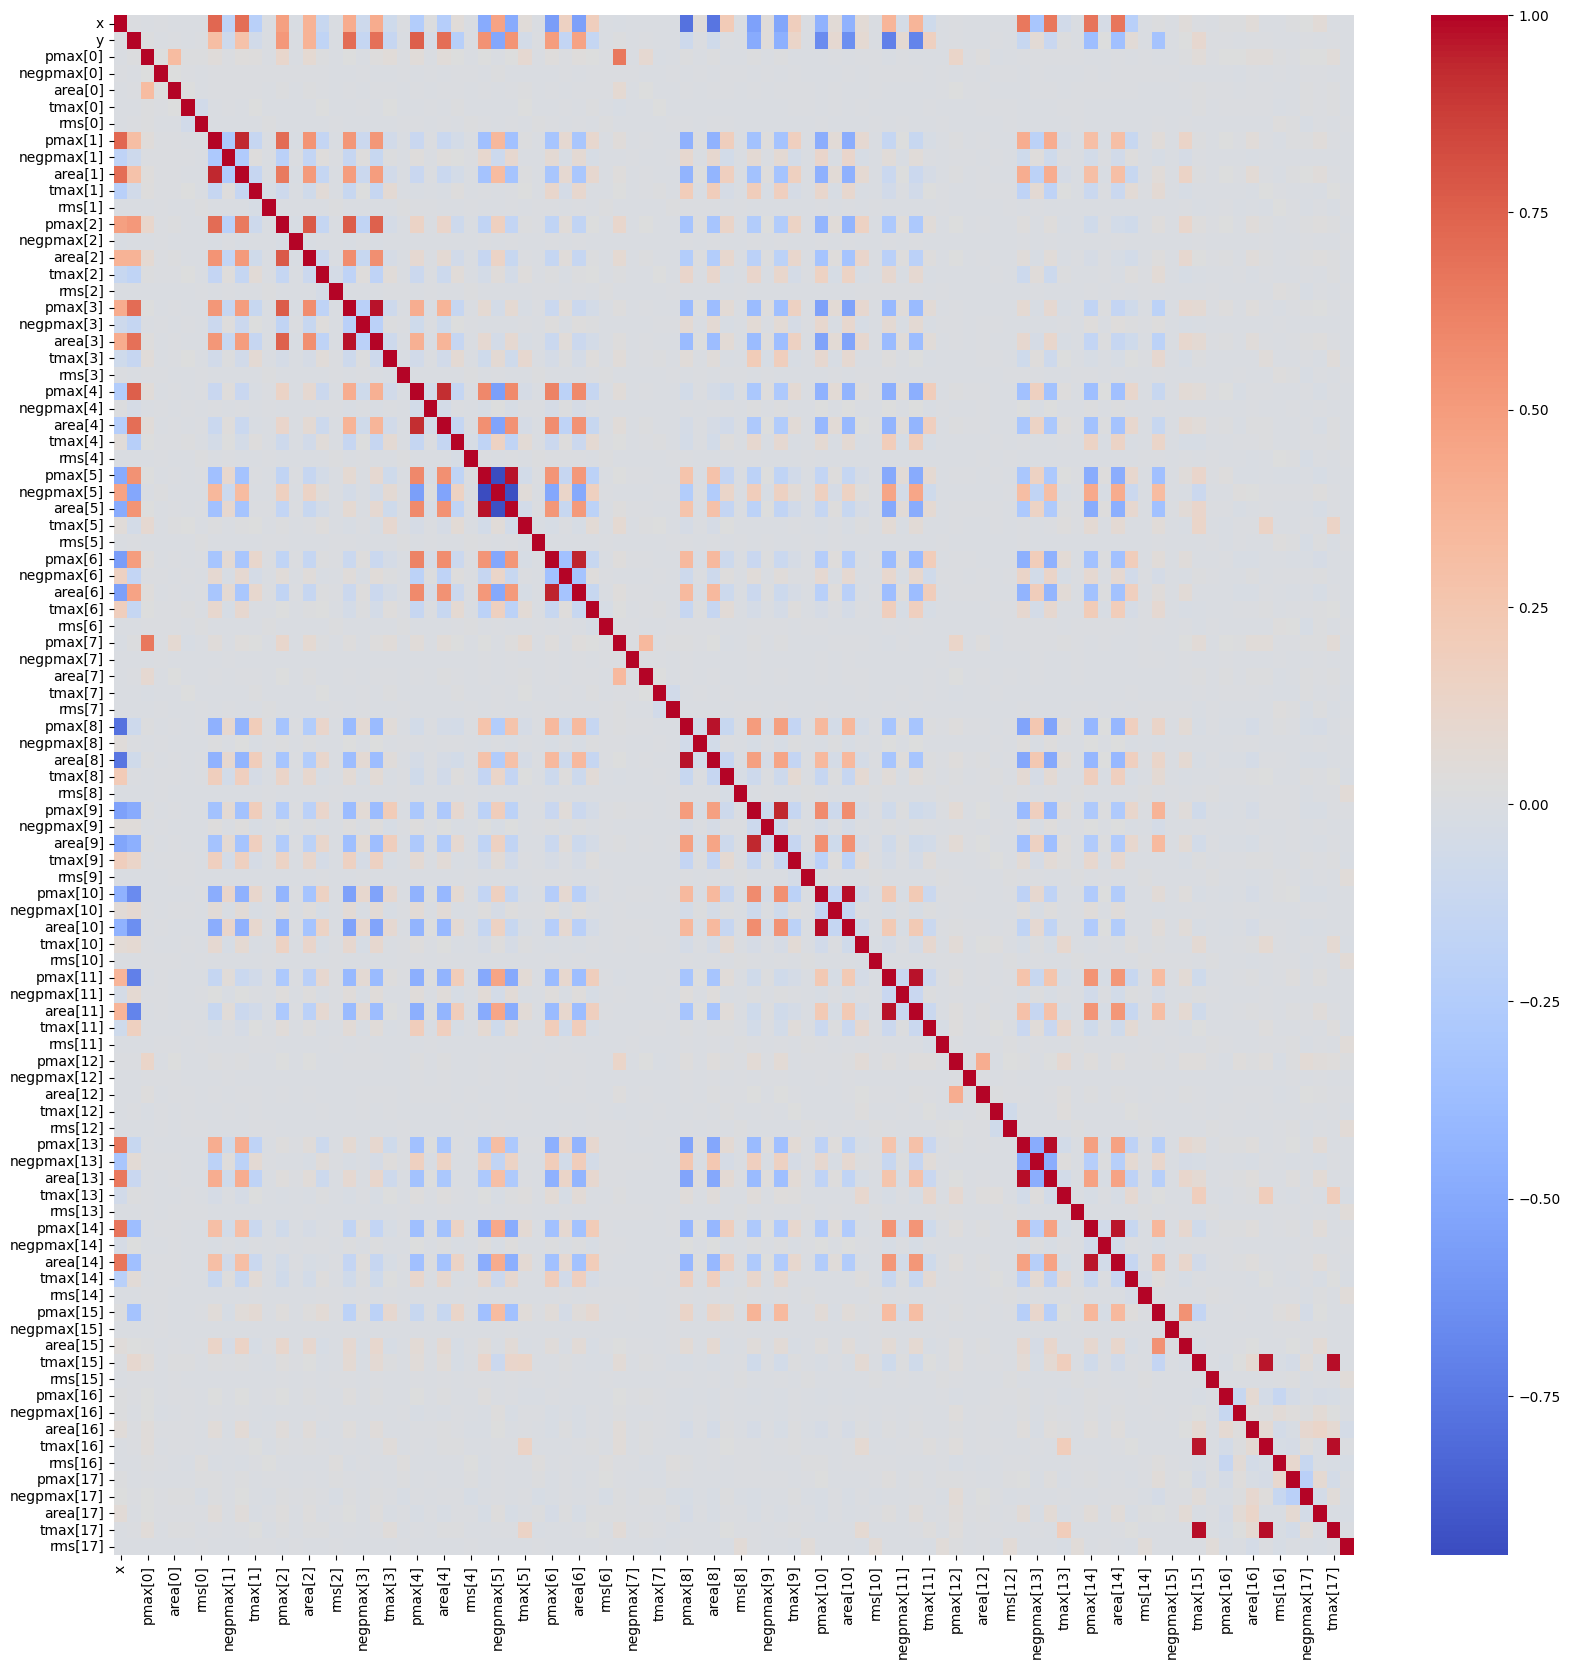

In [15]:
## Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

Looks like there are some pads/features that has low/none correlation with x and y values. Seems like it is pad (0, 7, 12, 15, 16, 17). 

In [16]:
## Removing pads with format: pads = ["0", "7", "12", ..]
def drop_pads(df, pads):
    cols_to_drop = [col for col in df.columns if any(idx in col for idx in pads)]
    df_removed = df.drop(cols_to_drop, axis=1)    
    return df_removed

df_copy = df 
df_copy.drop(["x", "y"], axis=1, inplace=True)
pads = ["0", "7", "12", "15", "16", "17"]

df_without_noise = drop_pads(df_copy,pads)

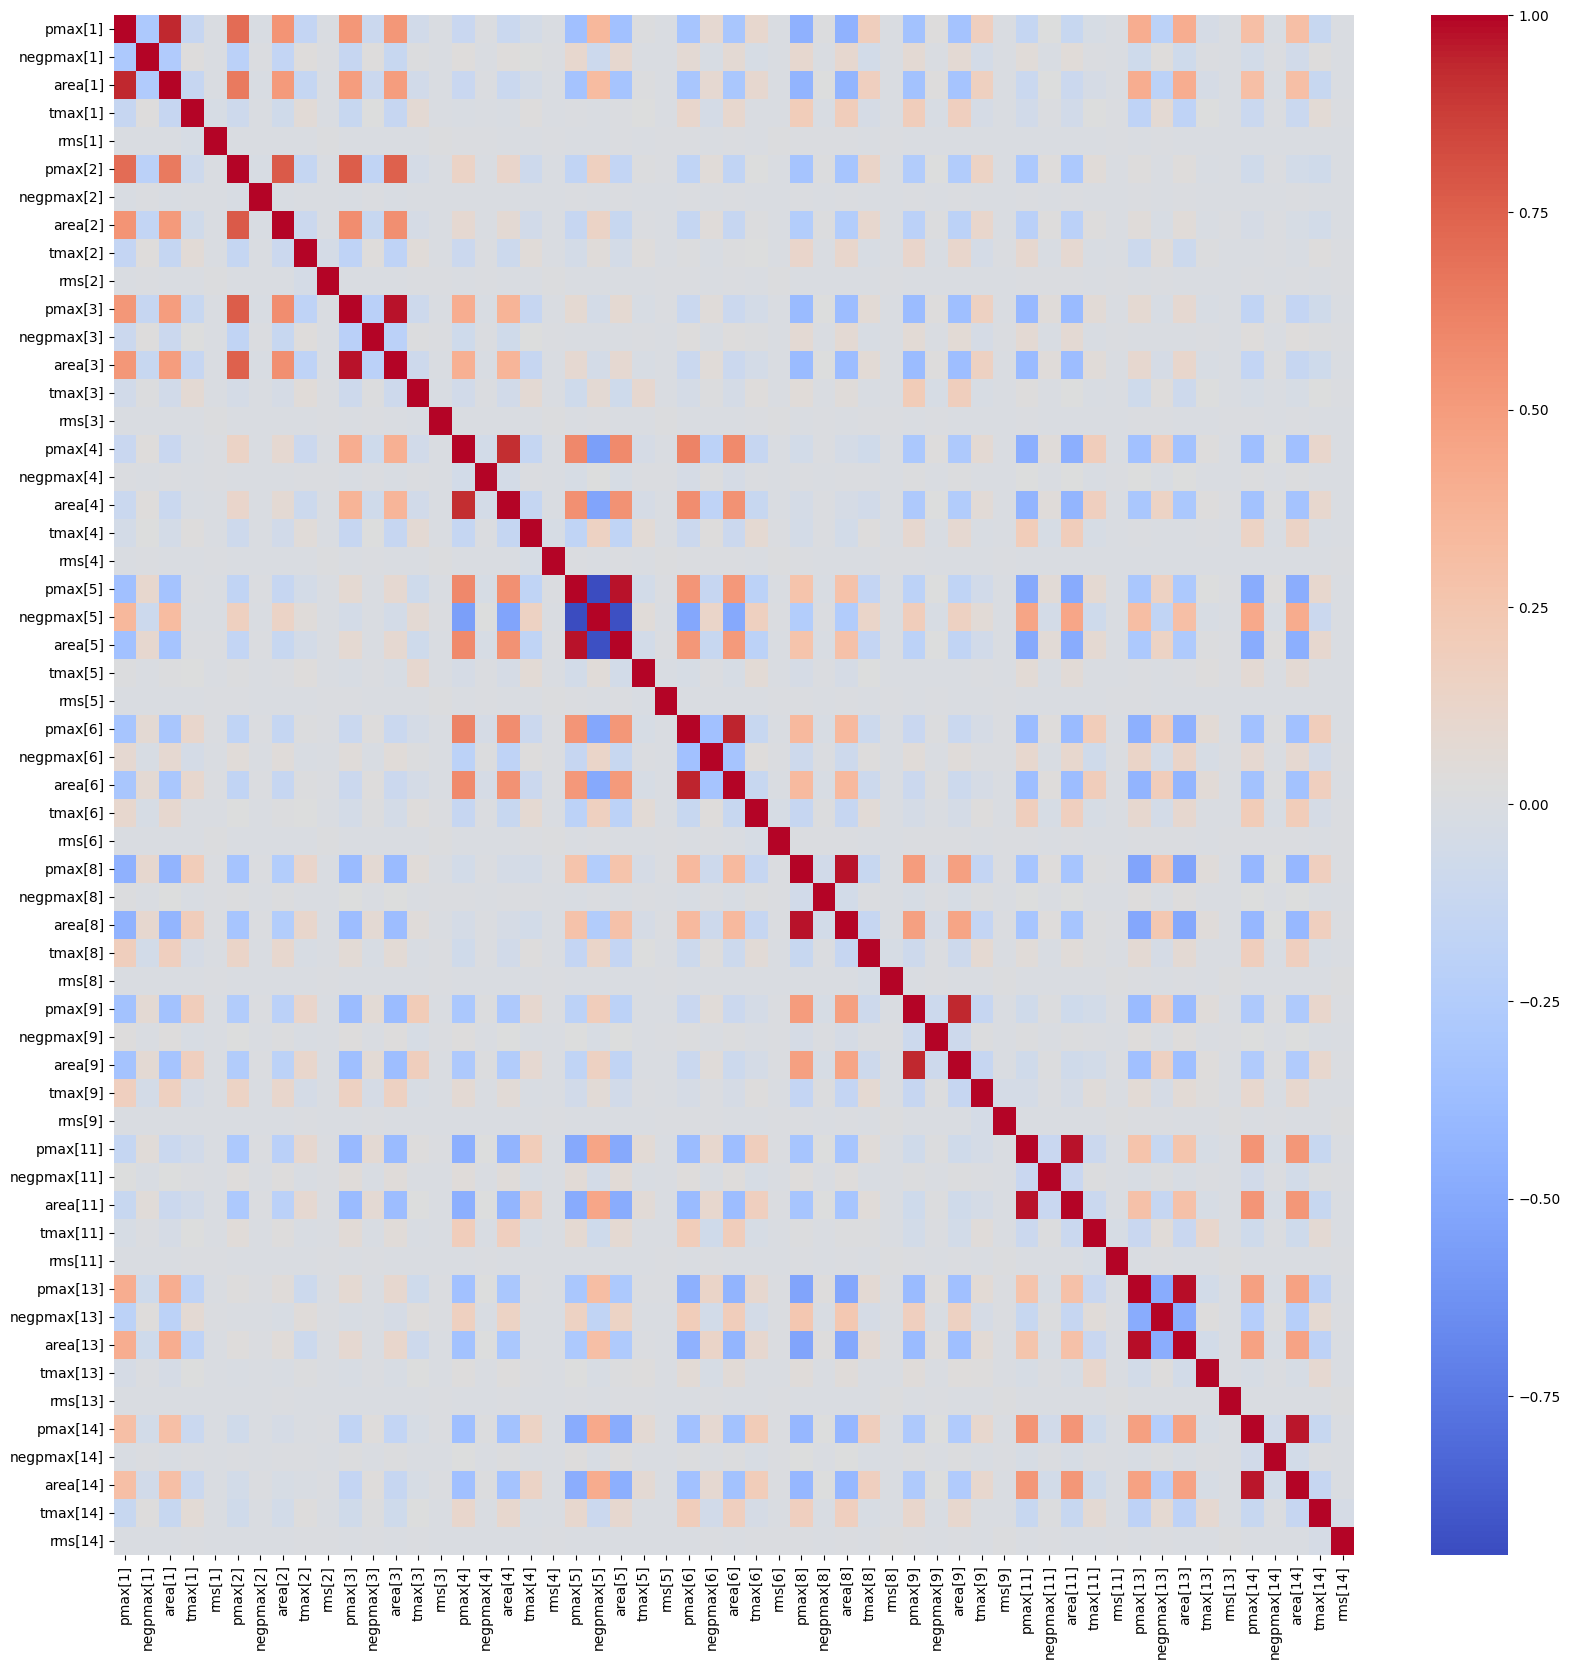

In [17]:
## Visualization without pads (0, 7, 12, 15, 16, 17)
correlation_matrix = df_without_noise.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

Seems like the rms feature does not contribute to any important information. Can consider to remove this feature as well.

In [79]:
def extract_rms_features(df):
    # Extract columns that start with 'rms'
    rms_columns = [col for col in df.columns if not col.startswith('rms')]

    # Create a new DataFrame without 'rms' columns
    df_without_rms = df[rms_columns] 
    return df_without_rms

In [80]:
df_interesting_data = extract_rms_features(df_without_noise)

In [81]:
df_interesting_data.columns

Index(['pmax[1]', 'negpmax[1]', 'area[1]', 'tmax[1]', 'pmax[2]', 'negpmax[2]',
       'area[2]', 'tmax[2]', 'pmax[3]', 'negpmax[3]', 'area[3]', 'tmax[3]',
       'pmax[4]', 'negpmax[4]', 'area[4]', 'tmax[4]', 'pmax[5]', 'negpmax[5]',
       'area[5]', 'tmax[5]', 'pmax[6]', 'negpmax[6]', 'area[6]', 'tmax[6]',
       'pmax[8]', 'negpmax[8]', 'area[8]', 'tmax[8]', 'pmax[9]', 'negpmax[9]',
       'area[9]', 'tmax[9]', 'pmax[11]', 'negpmax[11]', 'area[11]', 'tmax[11]',
       'pmax[13]', 'negpmax[13]', 'area[13]', 'tmax[13]', 'pmax[14]',
       'negpmax[14]', 'area[14]', 'tmax[14]'],
      dtype='object')

In [ ]:
## Visualization also without the rms feature